In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
penguin_df = pd.read_csv('./newpenguindata.csv')
penguin_df

,species,island,bl,bd,fl,bm,sex
0,Adelie,-1,39.1,18.7,181,3750,-1
1,Adelie,-1,39.5,17.4,186,3800,1
2,Adelie,-1,40.3,18.0,195,3250,1
3,Adelie,-1,36.7,19.3,193,3450,1
4,Adelie,-1,39.3,20.6,190,3650,-1
...,...,...,...,...,...,...,...
328,Chinstrap,1,55.8,19.8,207,4000,-1
329,Chinstrap,1,43.5,18.1,202,3400,1
330,Chinstrap,1,49.6,18.2,193,3775,-1
331,Chinstrap,1,50.8,19.0,210,4100,-1


In [4]:
penguin_df.describe()

,island,bl,bd,fl,bm,sex
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,0.228228,43.992793,17.164865,200.966967,4207.057057,-0.009009
std,0.678088,5.468668,1.969235,14.015765,805.215802,1.001464
min,-1.000000,32.100000,13.100000,172.000000,2700.000000,-1.000000
25%,0.000000,39.500000,15.600000,190.000000,3550.000000,-1.000000
50%,0.000000,44.500000,17.300000,197.000000,4050.000000,-1.000000
75%,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000
max,1.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


In [8]:
# 특성과 타겟 변수 분리
X = penguin_df.drop('species', axis=1)
y = penguin_df['species']

# 범주형 변수를 수치형으로 변환
X = pd.get_dummies(X, drop_first=True)

# 타겟 변수 라벨 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
# 학습/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 기본 학습자를 DecisionTreeClassifier로 설정
estimator = DecisionTreeClassifier(max_depth=2)

# AdaBoost 모델 생성
ab = AdaBoostClassifier(estimator=estimator, algorithm='SAMME', random_state=1)

In [17]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [1, 2, 3]
}

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=ab, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=2),
                                          random_state=1),
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [18]:
# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

Best parameters found: {'estimator__max_depth': 2, 'learning_rate': 1, 'n_estimators': 200}


In [19]:
# 최적 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [20]:
# 성능 평가
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 1.0
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



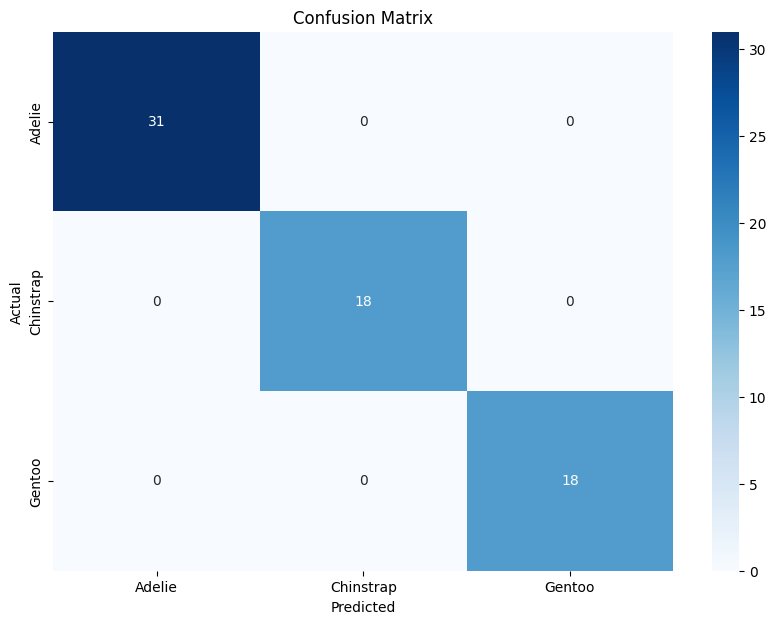

In [21]:
# 혼돈 행렬 계산 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()